K-NN (K-Nearest Neighbor) 알고리즘  
최근접 이웃 알고리즘  
도미인지 빙어인지 구별하는 Classification

In [18]:
import matplotlib.pyplot as plt

In [19]:
#도미 데이터

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

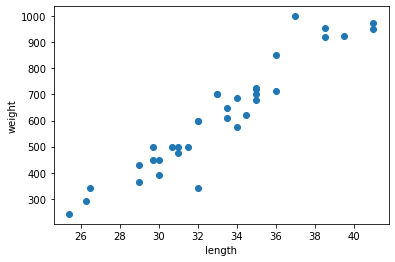

In [6]:
# 도미 데이터 산점도 확인

plt.scatter(bream_length,bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
#빙어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

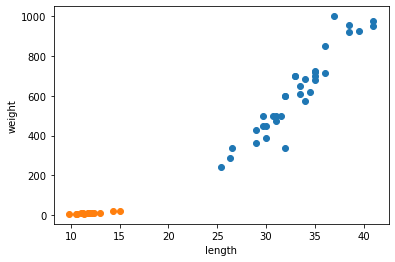

In [10]:
# 도비, 빙어 데이터 산점도 확인

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
#전처리를 파이썬만으로 처리한 버전

# 도미와 빙어 리스트를 하나의 리스트로 합침
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#사이킷런(scikit-learn) : 머신러닝 패키지, 이 패키지를 사용하려면 2차원 리스트로 만들어야 한다.
#아래와 같이 zip()함수와 리스트 내포 구문을 사용해 2차원 리스트로 만든다.

fish_data = [[l,w] for l,w in zip(length, weight)]

print(fish_data)

#[[length, weight],
# [length, weight],
#         .
#         .
#         .
# [length, weight]] 



[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [16]:
#정답 리스트
#정답을 만들기 위해 도미를 1, 빙어를 0으로 만든 리스트를 생성한다.

fish_target = [1] * 35 + [0] * 14

#사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier를 임포트한다.

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()  #임포트한 KNeighborsClassifier클래스의 객체를 먼저 만든다.
kn.fit(fish_data,fish_target)  #이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. 이 과정을 훈련(training)이라고 부름. fit이 이런 역할을 한다.
kn.score(fish_data,fish_target)  #모델이 얼마나 잘 훈련되었는지를 평가

1.0

In [17]:
#새로운 데이터 예측
kn.predict([[30, 600]])

array([1])

============================================================================================================================

In [26]:
#훈련 세트와 테스트 세트를 슬라이싱을 이용해 만들기

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]


In [27]:
#<샘플링 편향>

 

#- 샘플링 편향 : 훈련세트와 테스트세트가 골고루 섞여있지 않아 샘플링이 한쪽으로만 치우친 상태

#- 특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로 된 지도 학습 모델을 만들 수 없다

In [28]:
# 넘파이를 이용하요 샘플링 편향을 없앰

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#index를 arange로 만들어서 shuffle하는 방식을 사용한다.
#35개를 train set으로 15개를 test set으로 설정해 만들었다.

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


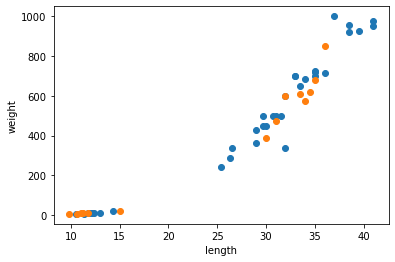

In [29]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

=====================================================================================================================

In [35]:
# 사이킷런을 이용하여 샘플링 편향 없앰 (더 편함)

#넘파이로 데이터 준비

fish_data = np.column_stack((length, weight))  #컬럼 방향으로 두 데이터를 자동으로 2차원 배열로 만듬

print(fish_data)

fish_target = np.concatenate((np.ones(35), np.zeros(14)))  #정답을 만들기위한 넘파이 배열, 넘파이 배열을 하나로 합침

print(fish_target)


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [36]:
#사이킷런으로 데이터 나눔

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

#stratify: 타깃 데이터가 비율에 맞춰 골고루 섞이도록 훈련세트와 테스트 세트를 나눠준다

1.0
[0.]


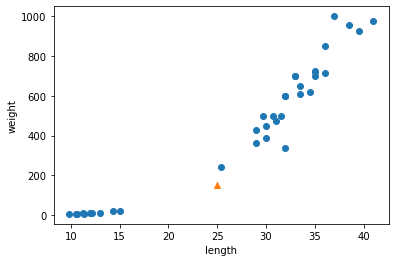

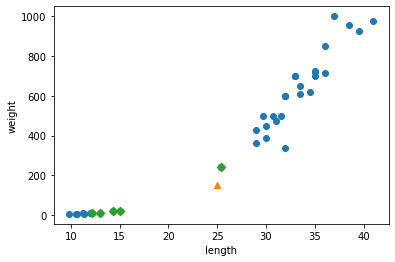

In [44]:
# 수상한 도미
#수상한 도미 한마리가 존재한다. 분명 산점도 상에 근접한건 도미인데 결과로 빙어를 정답으로 출력한다.

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()  #임포트한 KNeighborsClassifier클래스의 객체를 먼저 만든다.
kn.fit(train_input, train_target)  #이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. 이 과정을 훈련(training)이라고 부름. fit이 이런 역할을 한다.
print(kn.score(test_input, test_target))  #모델이 얼마나 잘 훈련되었는지를 평가

print(kn.predict([[25, 150]]))

# 데이터와 수상한 도미 한마리 산점도
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


distances, indexes = kn.kneighbors([[25,150]]) #n_neighbor=5라 기본값인 5개의 근접 이웃 거리, 인덱스 추출
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

실제 근접한 값 5개를 찾은 결과 빙어가 더 많긴 하다. 왜 이런 결과가 나타난 것일까? 그 이유는 바로 length와 weight의 비중이 다르기 때문이다. y축으로 올라갈 수록 x축보다 실제 거리의 차이가 확연히 벌어진다. x축은 5단위이고 y축은 200단위여서 단순히 빙어가 가까워 보이는 것이다.


위와 같은 상황을 막기 위해서는 적절한 기준값이 필요하다. 이를 위해 필요한 작업이 데이터 전처리이다. 보통 이런 상황에서 널리 사용하는 전처리 방법은 표준점수(z점수)이다. 표준점수는 각 특성값이 0에서 표준편차의 몇 배 만큼 떨어져 있는지를 나타내 특성값의 크기와 상관없이 동일한 조건으로 비교가 가능하다.

In [41]:
# 새로운 데이터 값이 1이 나와야 하지만 0이 나왔다 이는 길이와 무게의 스케일이(범위)가 달라서 일어난다

#데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계, 많은 시간이 소모되기도 한다.

 

#- 각각의 특성의 값이 놓인 범위가 매우 다르다 = 특성의 스케일이 다르다.

#- 특성의 스케일이 다르면 머신러닝 알고리즘을 예측하기 힘드므로, 특성을 일정한 기준으로 맞춰줘야 한다.

 

#- 표준점수(z점수) : 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나, 특성의 평균을 빼고 표준편차로 나눈 값.

#※ 반드시 훈련세트의 평균과 표준편차로 테스트세트를 바꿔야 한다.

 

#- 브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

In [45]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std #브로드 캐스팅: train_input의 모든 행에서 평균(meanm)값 만큼 빼준다.

sample = ([25,150]-mean)/std # 샘플도 표준점수화

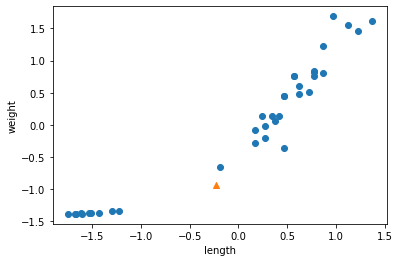

[1.]


In [46]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(sample[0],sample[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이제는 확실히 샘플이 도미에 가까워짐


test_scaled = (test_input - mean) / std #브로드 캐스팅: train_input의 모든 행에서 평균(meanm)값 만큼 빼준다.

kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print(kn.predict([sample])) #예측된 결과는 성공적으로 도미로 출력되었다.